# ZPEM2311 Maths Modelling Project Sophee Turner, Joshua Elphick & Liam Goldsworthy 

## Research Topic
How do imposed restrictions impact the future of COVID-19 severity? 

Using an SEIR compartmental model, we will be analysing the rates of change among the Susceptible (S), Exposed (E), Infectious (I), and Recovered (R). This analysis will compare the effects of multiple layers of restrictions including masks, quarantine, and travel and social restrictions on the number of people infected with COVID-19 over time. The term restrictions will be used throughout this proposal as a collective term for all of the above imposed restrictions.

## Abstract
This report intends to investigate the impact imposed restrictions have on the severity of COVID-19 infection. It studies the relationship between implementing restrictions and consequential spread. Imposed restrictions may include donning of facemasks, government restrictions on travel through border closures and private gathering limitations, they influence how harshly the population becomes exposed and consequently infected. This report will utilise Victoria as a case study that provides distinct data sets that can be fit into a mathematical model. From this model, data can be extracted through Jupyterlab software using Python coding. The mathematical model that will be used is the epidemiological SEIR model. The way this model works is it segregates the population into four distinct categories, those being Susceptible, Exposed, Infected and Recovered respectively. The rate at which proportions of the population change between these respective states reflects the severity of the spread. This information will be exhibited through various graphs developed on Jupyterlab within this report.

The outcome of the investigation concluded imposed restrictions have a substantial impact on the severity of COVID-19 infection. The data extrapolated through SEIR differential equations demonstrated a 18.83% decrease in population infected and an overall decreased amplitude of the exposed and infected population proportions. 


## Introduction
Coronavirus disease 2019 (COVID-19) is a highly contagious, respiratory and vascular disease. Common symptoms of this disease include coughing, shortness of breath, lost sense of taste and smell, fatigue and irritated throat. Long term effects of COVID-19 have not yet been defined due to the relatively young age of the disease. It is highly contagious and is most commonly spread through aerosols produced via an infected individual coughing, talking, breathing or sneezing. Government restrictions have been put in place so as to minimise the spread of COVID-19, they address the common forms of spread as mentioned (Victoria State Government, 2020). Through the use of the SEIR with data over a single area (Victoria), we are keeping variables such as population densities, demographic characteristics and infrastructure arrangement constant. This will give a better indication to how imposed restrictions influence the severity. 

How do imposed restrictions impact the future of COVID-19 severity? This research question has momentous relevance in the current global pandemic situation. If individuals better understand the impact restrictions have, it will prompt a realisation to the importance abiding fully to such restrictions. Furthermore, the hard evidence that mathematical modelling provides can ensure better governmental decision making on a regional, national and even global level. This justifies the relevance of the question being addressed in the report.


## Equations SEIR as Defined in our JupyterLab Repository

dSdt= - Beta * S * I

dEdt= ( Beta * S * I) - ( Kappa * E)

dIdt= ( Beta * S * I) -( Gamma * I)

dRdt= Gamma * I

The respective parameters in these equations represent;

 =  Contraction rate (Beta)

 =  Mean recovery rate (Gamma)

 =  Incubation Period (Kappa)

Where, 		
S = Susceptible
			E = Exposed 
			I = Infected
			R = Recovered

Assumptions,
			 = 0.97
			 = 14 
             
These equations are slightly different to those presented in the Written Research Proposal submitted earlier. The equations submitted earlier were obtained through online research and belong to authors Godio, Pace and Vergano (2020). The above equations however were deemed appropriate for addressing the research question through some trial runs in Jupyter Lab. These initial runs are illustrated below and demonstrate our differential equations appropriateness:

The below Figures, 1 - 4, have plotted the percentage of the population in each SEIR component against time. The parameter that has been deliberately adjusted to reinforce the appropriateness of the model is parameter Beta () which is the contraction rate. The contraction rate for each of the below figures was 2.5, 2, 1.8 and 1.2 respectively.

In [80]:
from numpy import arange, empty, exp, array, linspace
from scipy.integrate import odeint
from scipy.optimize import minimize
from plotly.offline import init_notebook_mode
from plotly import graph_objs as go

In [81]:
def dSEIRdt(SEIR, t, beta, gamma, kappa):
    S, E, I, R = SEIR
    dSdt = -beta*S*I
    dEdt = beta*S*I-kappa*E
    dIdt = beta*S*I-gamma*I
    dRdt = gamma*I
    return array([dSdt, dEdt, dIdt, dRdt])

# Basic graph of COVID-19 with no restrictions implemented   

In [54]:
# Initial number of infected and recovered individuals, I0 and R0.
# Everyone else, S0, is initially susceptible to infection. 
# Initial number of exposed individuals, E0
I0 = 5
S0 = 5926624
R0 = 0 
E0 = 0 
# Contraction rate, beta, and mean recovery rate, gamma, incubation period (days), kappa.
beta, gamma, kappa = 2.5, .97, 14

In [55]:
#Y axis represents S, E, I and R values
#X axis represents time
t = linspace(0, 30, 30)
SEIR = odeint(dSEIRdt, [1, 0,.00000084, 0], t, (beta, gamma, kappa))  
fig = go.Figure()

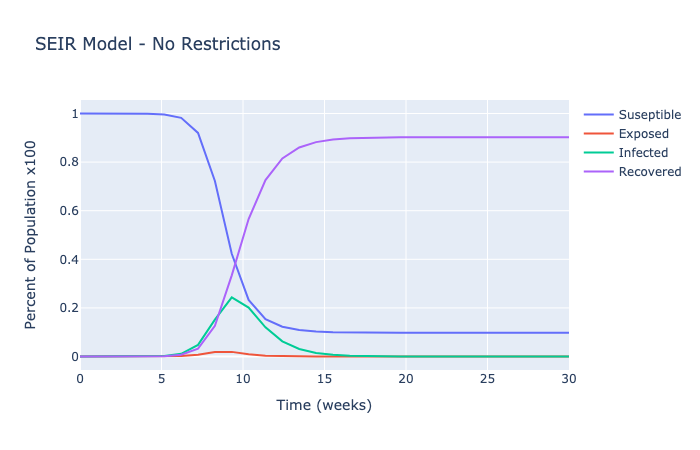

In [56]:
fig.add_trace(go.Scatter(x=t, y=SEIR[:,0], name='Suseptible'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,1], name='Exposed'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,2], name='Infected'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,3], name='Recovered')) 
fig.layout.update(dict(title='SEIR Model - No Restrictions',
                       xaxis=dict(title='Time (weeks)'),
                       yaxis=dict(title='Percent of Population x100')))
fig.show('png')

# Basic graph of COVID-19 with restrictions implemented - marginal effect    

In [8]:
# Initial number of infected and recovered individuals, I0 and R0.
# Everyone else, S0, is initially susceptible to infection. 
# Initial number of exposed individuals, E0
I0 = 5
S0 = 5926624
R0 = 0 
E0 = 0 
# Contraction rate, beta, and mean recovery rate, gamma, incubation period, kappa.
beta, gamma, kappa = 2, .97, 14 

In [9]:
#Y axis represents S, E, I and R values
#X axis represents time
t = linspace(0, 30, 30)
SEIR = odeint(dSEIRdt, [1, 0,.00000084, 0], t, (beta, gamma, kappa))  
fig = go.Figure()

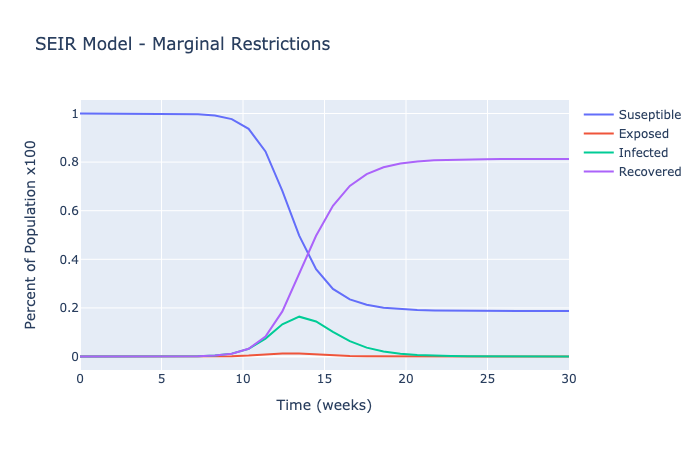

In [10]:
fig.add_trace(go.Scatter(x=t, y=SEIR[:,0], name='Suseptible'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,1], name='Exposed'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,2], name='Infected'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,3], name='Recovered')) 
fig.layout.update(dict(title='SEIR Model - Marginal Restrictions',
                       xaxis=dict(title='Time (weeks)'),
                       yaxis=dict(title='Percent of Population x100')))
fig.show('png')

# Basic graph of COVID-19 with restrictions implemented - adequate effect    

In [11]:
# Initial number of infected and recovered individuals, I0 and R0.
# Everyone else, S0, is initially susceptible to infection. 
# Initial number of exposed individuals, E0
I0 = 5
S0 = 5926624
R0 = 0 
E0 = 0 
# Contraction rate, beta, and mean recovery rate, gamma, incubation period, kappa.
beta, gamma, kappa = 1.8, .97, 14 

In [12]:
#Y axis represents S, E, I and R values
#X axis represents time
t = linspace(0, 40, 40)
SEIR = odeint(dSEIRdt, [1, 0,.00000084, 0], t, (beta, gamma, kappa))  
fig = go.Figure()

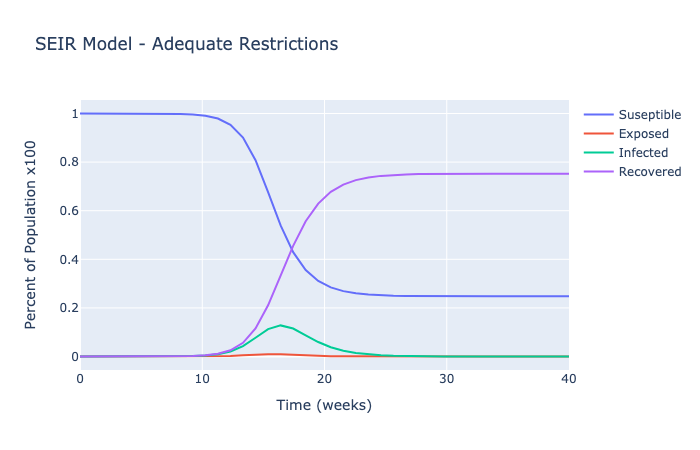

In [13]:
fig.add_trace(go.Scatter(x=t, y=SEIR[:,0], name='Suseptible'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,1], name='Exposed'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,2], name='Infected'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,3], name='Recovered')) 
fig.layout.update(dict(title='SEIR Model - Adequate Restrictions',
                       xaxis=dict(title='Time (weeks)'),
                       yaxis=dict(title='Percent of Population x100')))
fig.show('png')

# Basic graph of COVID-19 with restrictions implemented - great effect    

In [82]:
# Initial number of infected and recovered individuals, I0 and R0.
# Everyone else, S0, is initially susceptible to infection. 
# Initial number of exposed individuals, E0
I0 = 5
S0 = 5926624
R0 = 0 
E0 = 0 
# Contraction rate, beta, and mean recovery rate, gamma, incubation period, kappa.
beta, gamma, kappa = 1.2, .97, 14 

In [86]:
#Y axis represents S, E, I and R values
#X axis represents time
t = linspace(0, 100, 100)
SEIR = odeint(dSEIRdt, [1, 0,.00000084, 0], t, (beta, gamma, kappa))  
fig = go.Figure()

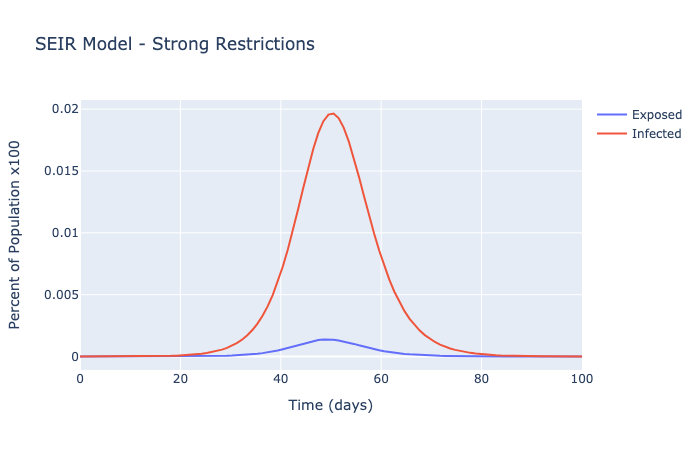

In [87]:
fig.add_trace(go.Scatter(x=t, y=SEIR[:,1], name='Exposed'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,2], name='Infected')) 
fig.layout.update(dict(title='SEIR Model - Strong Restrictions',
                       xaxis=dict(title='Time (days)'),
                       yaxis=dict(title='Percent of Population x100')))
fig.show('png')

## Observations made are as follows:

S:
The susceptible population remained susceptible for longer, however was subjected to a far more gradual transition into recovery. The reason for this steadier transition was the far smaller population that had become infected

E:
The exposed population dropped from around 10% of the population in Figure 1, to 1.3% as evident in Figure 4. 

I:
A drop from 20% of the population being infected to 5% falling into the infected category. Of additional note is that the occurrence of these infections was stretched further in time. The present “flattened curve” means more time and control to the COVID-19 spread will be apparent for the sample population. 

R:
Less of the population is observed to be recovered with increasing (from 90% to 55%), this has occurred due to much less of the population being infected prior.

The above graphs provide a thorough demonstration on how the mathematical model works. The reason for observation in R, being a decreasing recovered population despite reducing contraction rate, is due to the subsequential nature of the SEIR model. Transition through the SEIR stages must occur subsequently, that is in no case is a person able to transition from stage E to R without passing through stage I for example. Therefore, with less people infected, there are less people that can become recovered hence the value drops. 

## Is the Model Appropriate?

The main input that will be adjusted in order to obtain appropriate outputs is the contraction rate (Beta). The output that will be generated is the amount of people exposed and thus infected, this gives information pertaining to the severity of the disease. 

The contraction rate is directly dependent on imposed restrictions, thus the model is appropriate for use to address the research question. The above graphs produced outputs that met all expectations that were developed throughout the Written Research Proposal and other prior research. The graphs above are of similar attributes to those of the Reed-Frost SEIR model graphs that analysed the effect of heightened contact rates (Gurarie, 2012), further reinforcing the appropriateness of the chosen model.

With the model described and deemed appropriate, it is now able to be utilised with the COVID-19 Open Data set in order to validate the model for goodness of fit and predictive ability.


## Model Validation
For this model we utilized the GoogleCloudPlatform/covid-19-open-data. We specifically used data from Victoria, to validate our data against a state that was suffering from an extreme breakout of infections and decided to implement heavy restrictions to minimise exposure and community transmission. 

To enable a comparison, first the data was imported into our jupyter workpage. The  imported data sheet is represented in the graph below.


In [25]:
import pandas
from plotly import graph_objs as go

In [31]:
data = pandas.read_csv('https://storage.googleapis.com/covid19-open-data/v2/AU_VIC/main.csv') 

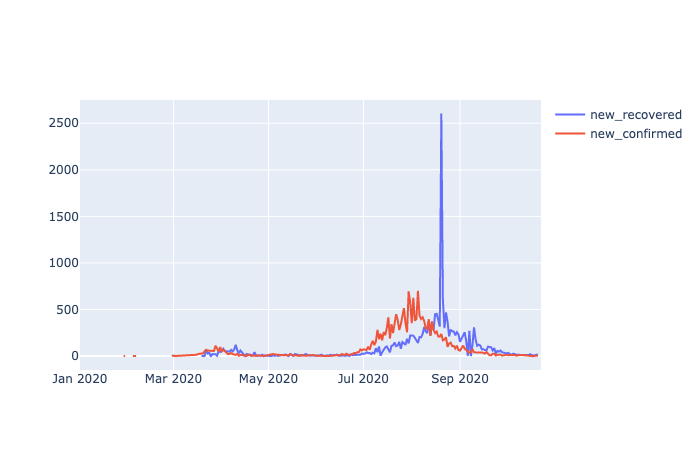

In [32]:
fig = go.Figure() 
fig.add_trace(go.Scatter(x=data['date'], y=data['new_recovered'], name='new_recovered'))
fig.add_trace(go.Scatter(x=data['date'], y=data['new_confirmed'], name='new_confirmed'))  
fig.show('png')

To gain a close comparison as to how the data fit into our model defined previously, we produced a new graph of just exposed and infected trends, this can be seen below.

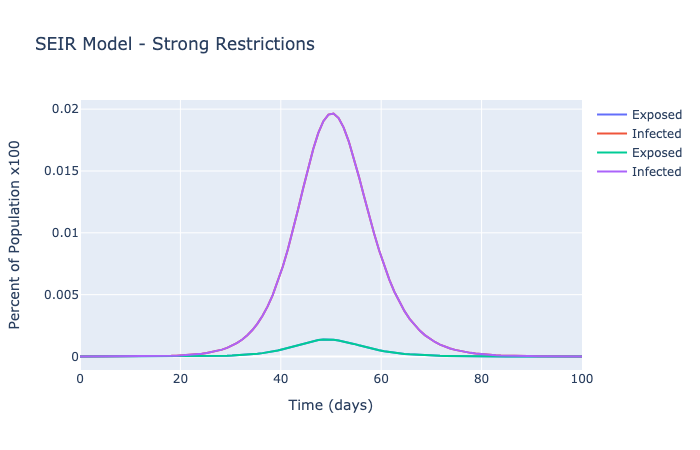

In [88]:
fig.add_trace(go.Scatter(x=t, y=SEIR[:,1], name='Exposed'))
fig.add_trace(go.Scatter(x=t, y=SEIR[:,2], name='Infected')) 
fig.layout.update(dict(title='SEIR Model - Strong Restrictions',
                       xaxis=dict(title='Time (days)'),
                       yaxis=dict(title='Percent of Population x100')))
fig.show('png')

A similarity in the bell-curve tendency of the graphs above can be observed. This provides an initial validation for the fit of our model. Whilst the outline of the graphs are of similar nature, they do have some distinct differences. One key difference is our model sustains a more prolonged time period over which the population spends in the infected category. The real data set demonstrates the peak infection occurred in August, a month on the other side of this peak and the infected could be approximated at 0.

To conduct a full assessment of the validity of our model, it must be fit to the real data set on JupyterLab. By completing this fit, the general tendencies of visual similarity and difference can be observed. Furthermore to visual observation, a RMS function can be conducted that quantitatively indicates the spread of predictions against what actually happens. The RMS provides an indication of error, and is most useful when comparing alternate models to find the most suitable one. 


Through the attempt to find the goodness of fit and thus validate the predictive ability of our model, we used Fit function to render the below diagram. The blue and red is victorian data, specifically being total recovered and total confirmed respectively. We then have the orange and blue plots, which pertain to our models infected and recovered populations respectively. The comparison is conducted within the time period from 05 July 2020 and 30 September 2020.


In [62]:
from numpy import arange, empty, exp, array, linspace

In [63]:
from datetime import date
from plotly.offline import init_notebook_mode
from plotly import graph_objs as go
import pandas
from numpy import zeros, inf
from scipy.integrate import odeint
from scipy.optimize import curve_fit

In [64]:
data = pandas.read_csv('https://storage.googleapis.com/covid19-open-data/v2/AU_VIC/main.csv') 
data = data[(data['date'] >= '2020-07-05') & (data['date'] < '2020-09-30')]

In [65]:
def extract_t_from(data):
    dates = data['date'].apply(date.fromisoformat).tolist()
    return [(d - dates[0]).days for d in dates] 
timelist = extract_t_from(data) 

In [66]:
def dSEIRdt(SEIR, t):
    S, E, I, R = SEIR
    dSdt = -beta*S*I
    dEdt = beta*S*I-kappa*E
    dIdt = beta*S*I-gamma*I
    dRdt = gamma*I
    return array([dSdt, dEdt, dIdt, dRdt])

In [67]:
def extract_t_from(data):
    dates = data['date'].apply(date.fromisoformat).tolist()
    return [(d - dates[0]).days for d in dates]

In [68]:
# Initial number of infected and recovered individuals, I0 and R0.
# Everyone else, S0, is initially susceptible to infection. 
# Initial number of exposed individuals, E0
I0 = 5
S0 = 30000
R0 = 0 
E0 = 0 
# Contraction rate, beta, and mean recovery rate, gamma, incubation period (days), kappa.
beta, gamma, kappa = 1.2, .97, 14

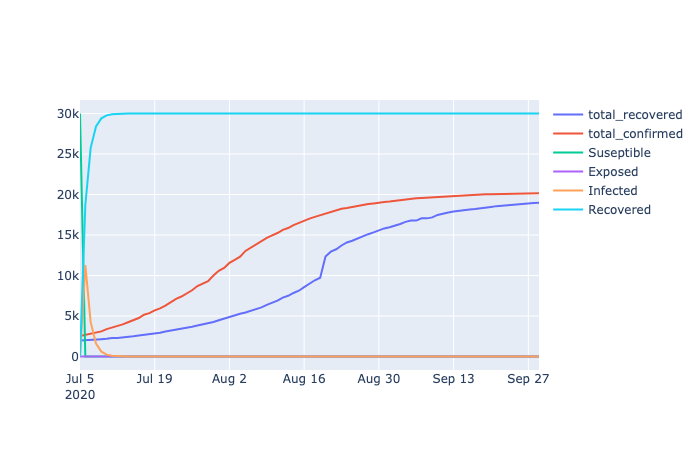

In [69]:
t = linspace(0,120,120) 
SEIR = odeint(dSEIRdt, [30000, 0,5, 0], t)
fig = go.Figure() 
fig.add_trace(go.Scatter(x=data['date'], y=data['total_recovered'], name='total_recovered'))
fig.add_trace(go.Scatter(x=data['date'], y=data['total_confirmed'], name='total_confirmed'))  
fig.add_trace(go.Scatter(x=data['date'], y=SEIR[:,0], name='Suseptible'))
fig.add_trace(go.Scatter(x=data['date'], y=SEIR[:,1], name='Exposed'))
fig.add_trace(go.Scatter(x=data['date'], y=SEIR[:,2], name='Infected'))
fig.add_trace(go.Scatter(x=data['date'], y=SEIR[:,3], name='Recovered'))
fig.show('png')

The graph produced fails to validate the model through the Fit function attempt. This lack of suitability is most likely due to an error in the coding or from incorrect substitution of parameters. Our group explored avenues with different parameters, and alternate approaches to forming the Fit (such as not using String values for the y-axis but rather quantitative figures) however these approaches rendered no more suitable validations. This is unfortunate, as because of the undetermined error we were unable to conduct a Root-Mean-Squared (RMS) function to assess the error produced by the model.  

If we were able to use the RMS function, it would grant credibility in the model that extends beyond observed visual comparison


## Results
The results obtained from the SEIR model do successfully produce an answer to the proposed research question. The results are divided into answering the research question through the modelling of predicted data, and the comparison of this model to the live data and trends of the COVID-19 spread in Victoria, Australia, in order to validate our findings.


_How do imposed restrictions impact infectious rates of COVID-19 in Victoria?_ The SEIR model created using varying contraction rates allows for quantifiable results to manifest. The contraction rate decreases to simulate the increased restrictions imposed on a population and as a result there is a significant decrease in exposed and infected rates in each of the four models. 

<b>Contraction Rate</b>          -            Peak Exposed          -      Peak Infected 

<b>No Restrictions (Beta = 2.5)</b>       -        7.04 %          -            24.08 %

<b>Marginal Restrictions (Beta = 2)</b>     -      4.53 %           -           15.85 %

<b>Adequate Restrictions (Beta = 1.8)</b>    -     3.38 %          -            12.62 %

<b>Strong Restrictions (Beta = 1.2)</b>     -      00.13 %          -             01.96 %


These results show a 5.72% decrease in exposed and 18.83% decrease in infected population between no restrictions and strong restrictions. This indicates that there is a clear decrease in the infected and exposed rates as the contraction rate is decreased. This answers the proposed research question, that as restrictions are increased, the rate of community infection is significantly increased. This indicates that restrictions are effective.

Overall this model was a success, producing results as predicted in the project proposals. It successfully illustrated the effects of restrictions on transmission. As discussed above this was not able to be successfully validated through the comparison to data from Victoria, Australia, however analysis of the Victorian data does still validate this model in a sense. Data from Victoria indicates a similar result to that that this model produced, being that restrictions help to effectively reduce community transmission od COVID-19. Despite the inability to successfully model this data in a graph that would help to validate our findings, the results yielded through the real life implication of heavy restrictions shows the same conclusion that our model found.


## Conclusions

The intention of this report was to determine the impact imposed restrictions have on the future of COVID-19 severity. Through the development of an appropriate model and utilisation of math modelling our research concluded that severity will reduce significantly if restrictions are imposed. An 18.83% decrease in population infection was found through using differential equations and deliberately varying the parameter pertaining to the contraction rate. The intention of this variation was to mimic the effect of imposed restrictions, the result was influenced by patterns of severity. Our model failed verification against the Victoria data-set but despite this when compared to the raw data visually it is deemed appropriate for concluding imposed restrictions are an effective method of reducing future COVID-19 severity.


## References

 Australian Government Department of Health. (2020, August 03). What you need to know about coronavirus (COVID-19). Retrieved from https://www.health.gov.au/news/health-alerts/novel-coronavirus-2019-ncov-health-alert/what-you-need-to-know-about-coronavirus-covid-19

Davies, N., Eggo, R. M., Kucharski, A. J., Russell, T. W., Liu, Y., & Prem, K. (2020, May). The effect of control strategies to reduce social mixing on outcomes of the COVID-19 epidemic in Wuhan, China: A modelling study. Retrieved from https://www.thelancet.com/action/showPdf?pii=S2468-2667%2820%2930073-6

Godio, A., Pace, F., & Vergnano, A. (2020, May 18). SEIR Modelling of the Italian Epidemic of SARS-CoV-2 Using Computational Swarm Intelligence. Retrieved from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7277829/
Rachael L. Brown. (2020, June 23). Scientific modelling is steering our response to coronavirus. But what is scientific modelling? Retrieved from https://theconversation.com/scientific-modelling-is-steering-our-response-to-coronavirus-but-what-is-scientific-modelling-135938

Radulescu, A., & Cavanagh, K. (2020, March 26). Management strategies in a SEIR model of COVID 19 community spread. Retrieved August 06, 2020, from https://arxiv.org/pdf/2003.11150.pdf

What you need to know – Version 11. (2020, March 11). Retrieved from https://www.health.gov.au/sites/default/files/documents/2020/03/coronavirus-covid-19-what-you-need-to-know_1.pdf?mc_cid=c24f0a9ced&mc_eid=4c27d1d1ea

Worldometer. (2020). Coronavirus Cases Retrieved from https://www.worldometers.info/coronavirus/


## Contributions
Coding primarily conducted by Liam Goldsworthy with member input at various stages. All coding conducted through Liam Goldsworthy's account however, all members had some contributions. The report was completed primarily by Josh Elphick, with some sections being completed by Sophee Turner. Sophee also conducted oversight and proofing of the report and the project overall. Layout and collation conducted by Liam Goldsworthy.   